Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

Importing Dataset

In [2]:
data = pd.read_csv('/content/Loan_Prediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Checking For Null values

In [4]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Replacing Null Values with Mode and Median

In [5]:
data["Gender"].fillna(data['Gender'].mode()[0],inplace = True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)
data['Credit_History'].fillna(data['Credit_History'].median(),inplace=True)
data["Married"].fillna(data['Married'].mode()[0],inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace = True)

Verifying

In [7]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Analysis of Unique Count of Attributes

In [8]:
for col in data.columns:
    print(data[col].value_counts(),"\n")

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64 

Male      502
Female    112
Name: Gender, dtype: int64 

Yes    401
No     213
Name: Married, dtype: int64 

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

No     532
Yes     82
Name: Self_Employed, dtype: int64 

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64 

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64 

128.0    33
120.0    20
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253

Descriptive Analysis

In [10]:
data.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,502,401,360,480,532,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,145.752443,342.410423,0.855049,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,84.107233,64.428629,0.352339,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN,NaN


Univariate Analysis

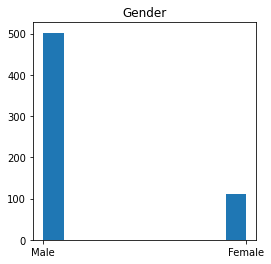

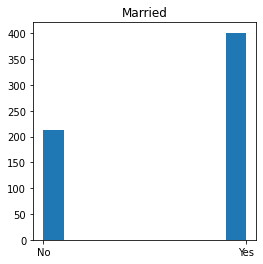

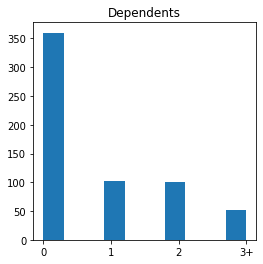

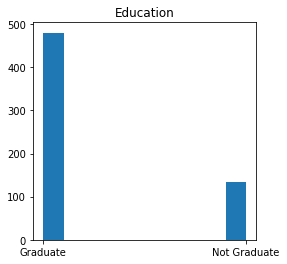

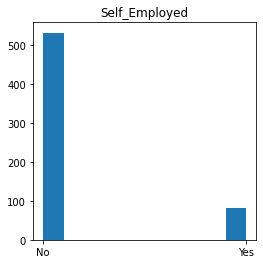

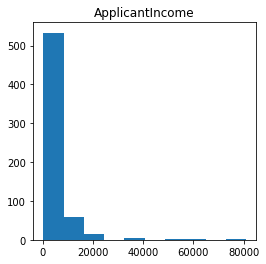

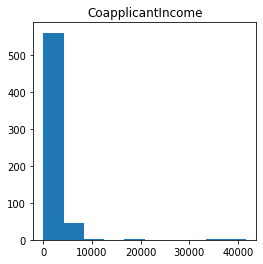

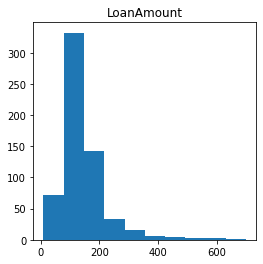

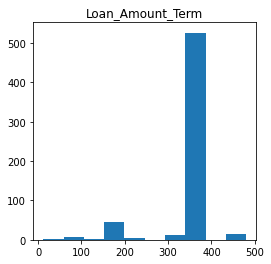

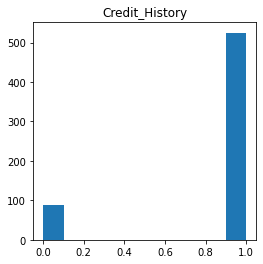

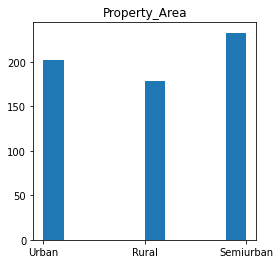

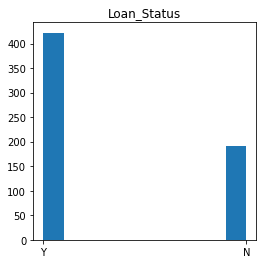

In [12]:
for col in data.columns[1:]:
    f = plt.figure()
    f.set_figwidth(4)
    f.set_figheight(4)
    plt.title(col)
    plt.hist(data[col])

Bivariate Analysis

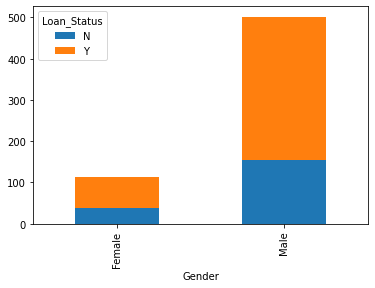

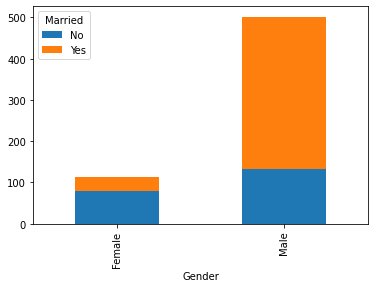

In [13]:
pd.DataFrame({'Loan_Status':data['Loan_Status'],
              'Gender':data['Gender']})
pd.crosstab(data['Gender'],data['Loan_Status']).plot(kind="bar",stacked=True)

pd.DataFrame({'Married':data['Married'],
              'Gender':data['Gender']})
pd.crosstab(data['Gender'],data['Married']).plot(kind="bar",stacked=True)

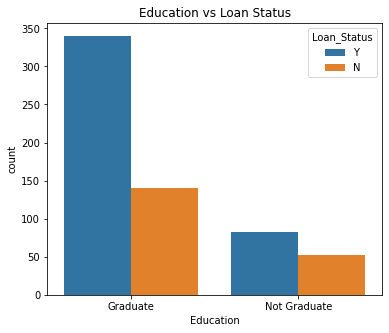

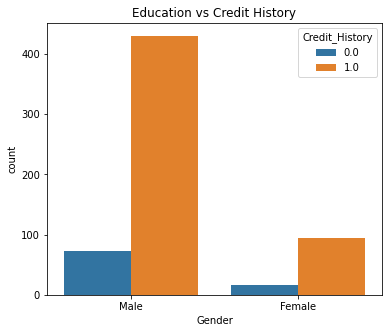

In [14]:
def countplot_of_2(x,hue,title=None,figsize=(6,5)):
    plt.figure(figsize=figsize)
    sns.countplot(data=data[[x,hue]],x=x,hue=hue)
    plt.title(title)
    plt.show()
countplot_of_2('Education','Loan_Status','Education vs Loan Status')
countplot_of_2('Gender','Credit_History','Education vs Credit History')

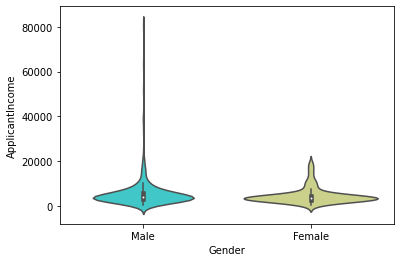

In [16]:
sns.violinplot(x="Gender", y="ApplicantIncome", data=data,palette='rainbow')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 23.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 31.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


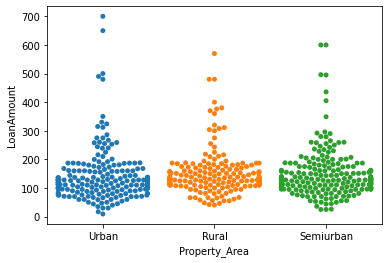

In [17]:
sns.swarmplot(x="Property_Area", y="LoanAmount", data=data)

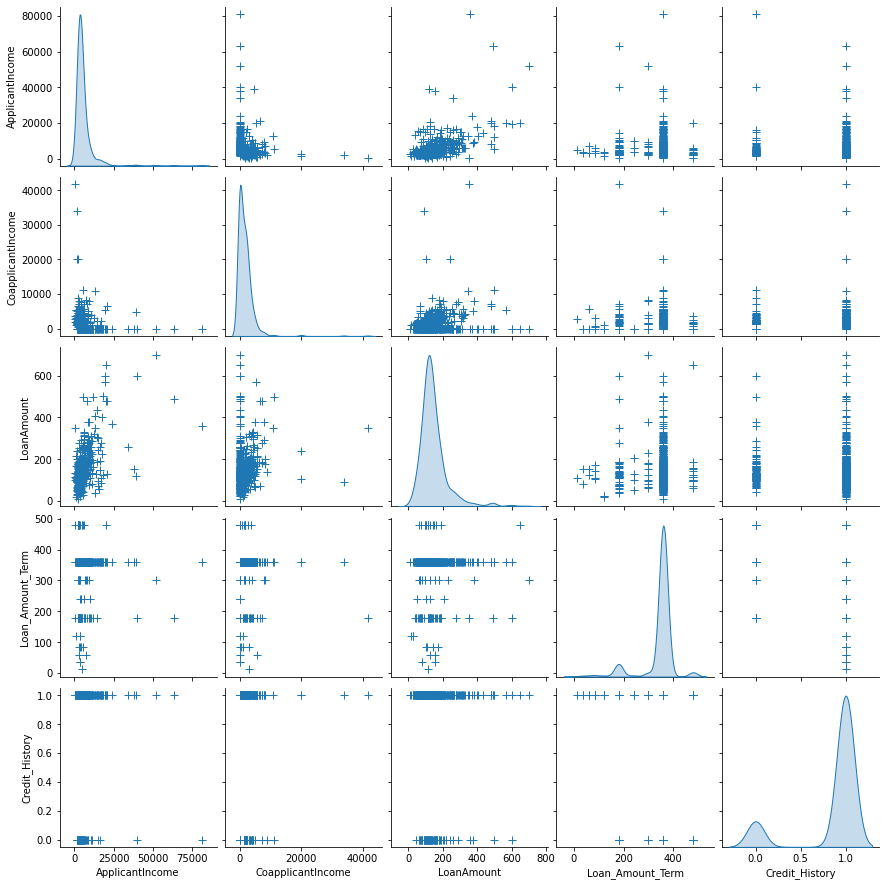

In [18]:
sns.pairplot(data, diag_kind="kde", markers="+",
                 plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                 diag_kws=dict(shade=True))

Multivariate Analysis

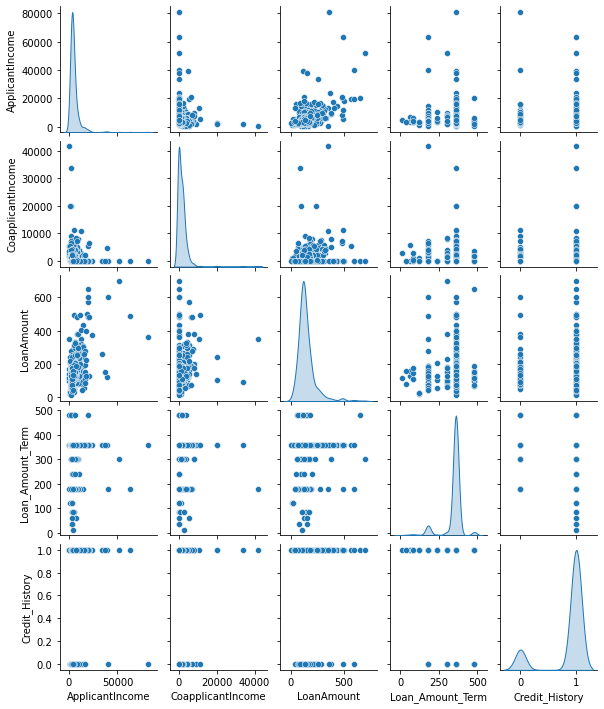

In [19]:
sns.pairplot(
    data=data, height = 2,
    aspect=.85,kind='scatter',diag_kind='kde')

In [20]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


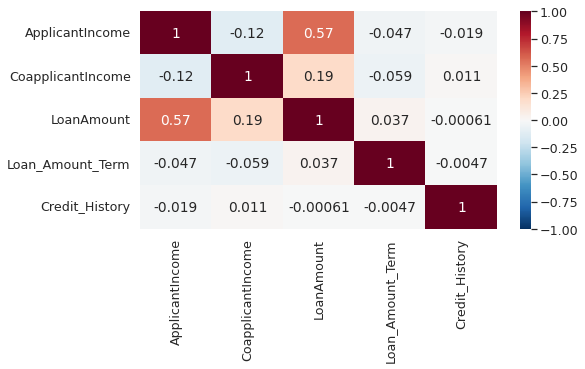

In [21]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(data.corr(),cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1)